## Supervise.ly bitmap-based label data from JSON to image 

- `PIL` is really installed as `pillow`
- `cv2` is really installed as `opencv`

```
conda create --name cv2 opencv pillow scikit-image numpy zlib matplotlib
```

In [22]:
import cv2
from PIL import Image
import zlib
import numpy as np
import io
import json
import base64
from skimage import io as skio
import matplotlib.pyplot as plt

https://docs.supervise.ly/data-organization/import-export/supervisely-format#bitmap

Heeded a warning and changed `np.fromstring()` to `np.frombuffer()` and seems to work fine

In [15]:
def base64_2_mask(s):
    z = zlib.decompress(base64.b64decode(s))
    n = np.frombuffer(z, np.uint8)
    mask = cv2.imdecode(n, cv2.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
    return mask

def mask_2_base64(mask):
    img_pil = Image.fromarray(np.array(mask, dtype=np.uint8))
    img_pil.putpalette([0,0,0,255,255,255])
    bytes_io = io.BytesIO()
    img_pil.save(bytes_io, format='PNG', transparency=0, optimize=0)
    bytes = bytes_io.getvalue()
    return base64.b64encode(zlib.compress(bytes)).decode('utf-8')

In [6]:
with open('melgaco2.jpg.json','r') as f:
    annotations = json.load(f)

In [10]:
for ii,ob in enumerate(annotations['objects']):
    print(ii, ob['id'], ob['geometryType'])

0 455524684 polygon
1 455524879 polygon
2 455525094 polygon
3 455525139 polygon
4 455525195 polygon
5 455525319 polygon
6 455525361 polygon
7 455525387 polygon
8 455525455 polygon
9 455525565 polygon
10 455525654 polygon
11 455525667 polygon
12 455525678 polygon
13 455525686 polygon
14 455525701 polygon
15 455525741 bitmap
16 455525808 bitmap
17 455525835 bitmap
18 455526017 bitmap
19 455526165 cuboid


In [11]:
ob15 = annotations['objects'][15]
bitmap15 = ob15['bitmap']

In [17]:
mask15 = base64_2_mask(bitmap15['data'])
mask15

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

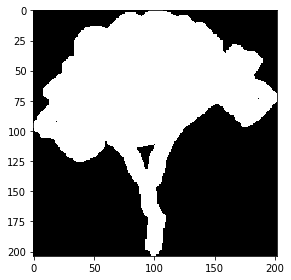

In [25]:
skio.imshow(mask15);

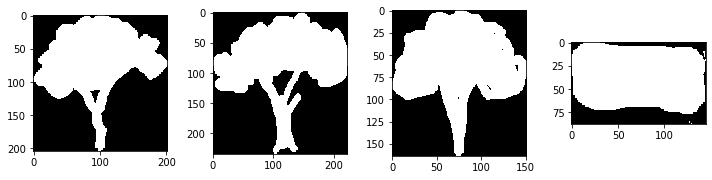

In [39]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
skio.imshow(base64_2_mask(annotations['objects'][15]['bitmap']['data']),ax=ax1);
skio.imshow(base64_2_mask(annotations['objects'][16]['bitmap']['data']),ax=ax2);
skio.imshow(base64_2_mask(annotations['objects'][17]['bitmap']['data']),ax=ax3);
skio.imshow(base64_2_mask(annotations['objects'][18]['bitmap']['data']),ax=ax4);